# LeNet-5 Implementation using TensorFlow

## 1. Import Libraries:

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 2. Prepare the Dataset (e.g., MNIST):

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Pad images to 32x32 as required by original LeNet-5
train_images = tf.pad(train_images, [[0, 0], [2, 2], [2, 2]])
test_images = tf.pad(test_images, [[0, 0], [2, 2], [2, 2]])

# Reshape to include channel dimension and normalize pixel values
train_images = tf.expand_dims(tf.cast(train_images, tf.float32), axis=3) / 255.0
test_images = tf.expand_dims(tf.cast(test_images, tf.float32), axis=3) / 255.0

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


## 3. Define the LeNet-5 Model:

In [5]:
def create_lenet5_model():
    model = models.Sequential()

    # C1: Convolutional layer with 6 filters
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 1)))
    # S2: Average pooling layer
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # C3: Convolutional layer with 16 filters
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    # S4: Average pooling layer
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the output for fully connected layers
    model.add(layers.Flatten())

    # F5: Fully connected layer with 120 units
    model.add(layers.Dense(120, activation='tanh'))
    # F6: Fully connected layer with 84 units
    model.add(layers.Dense(84, activation='tanh'))
    # Output layer with 10 units for 10 classes (digits)
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = create_lenet5_model()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile and Train the Model:

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8748 - loss: 0.4257 - val_accuracy: 0.9699 - val_loss: 0.1004
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9715 - loss: 0.0908 - val_accuracy: 0.9768 - val_loss: 0.0701
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9822 - loss: 0.0554 - val_accuracy: 0.9809 - val_loss: 0.0570
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0414 - val_accuracy: 0.9786 - val_loss: 0.0669
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9837 - val_loss: 0.0514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0263 - val_accuracy: 0.9859 - val_loss: 0.0445
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9848 - val_loss: 0.0504
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9932 - loss: 0.0207 - 

## 5. Evaluate and Visualize Results:

313/313 - 1s - 2ms/step - accuracy: 0.9871 - loss: 0.0461

Test accuracy: 0.9871000051498413

Test loss: 0.04605433717370033


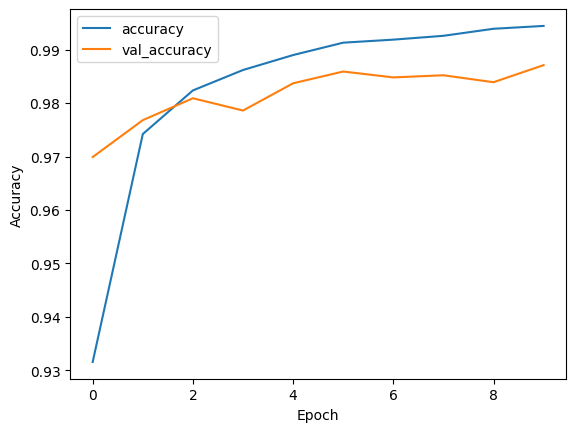

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
# plt.ylim(0.9,1.1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
X_new = test_images[14:17]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([1, 5, 9])

In [20]:
test_labels[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

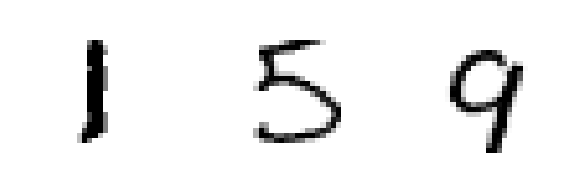

In [21]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    # plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()